# Pandas and Matplotlib Tackle Graduate Admissions Data
Source: Kaggle, https://www.kaggle.com/mohansacharya/graduate-admissions/  
  Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019  
    
### 1. Load in Data
Import numpy, pandas and matplotlib libraries, and load data into a Pandas dataframe.  
Print data shape and summary info of data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df.shape)
df.info()

(500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### 2. Clean up Columns
Delete the first column (serial num) since Pandas already assigns an id to each row.  
Rename the columns to simpler names. Print first 5 rows.

In [3]:
df = df.drop(['Serial No.'], axis=1)
new_names = {'GRE Score':'gre', 'TOEFL Score':'toefl', 'University Rating':'rating', 'SOP':'sop', 'LOR':'lor', 'CGPA':'gpa', 'Research':'research', 'Chance of Admit ':'chance'}
df.rename(columns=new_names, inplace=True)
df.head()

,gre,toefl,rating,sop,LOR,gpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### 3. Scope out Data
Show boxplots to see high-level distribution of main columns.  
Use pandas.describe() to see high-level distribution of data.

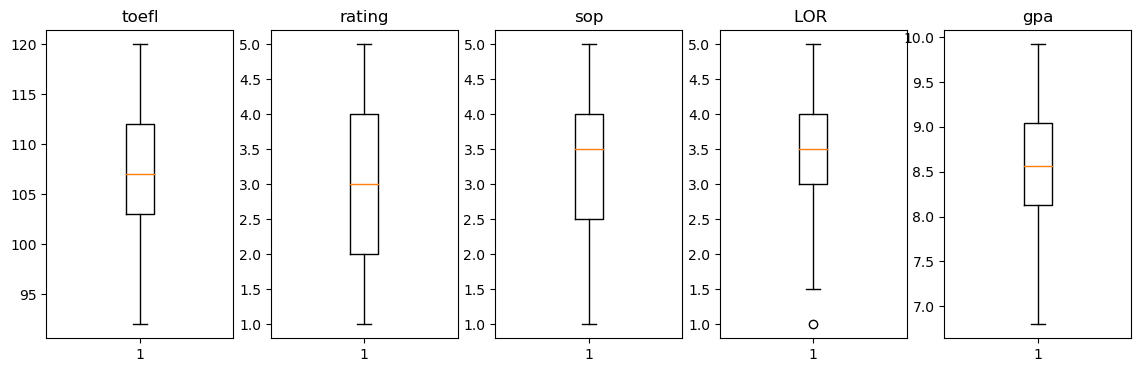

,gre,toefl,rating,sop,LOR,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
plt.figure(1, figsize=(14,4))
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
plt.show()
df.describe()

### 4. Detailed Data Distribution
Plot histograms for main columns to show detailed distribution of data

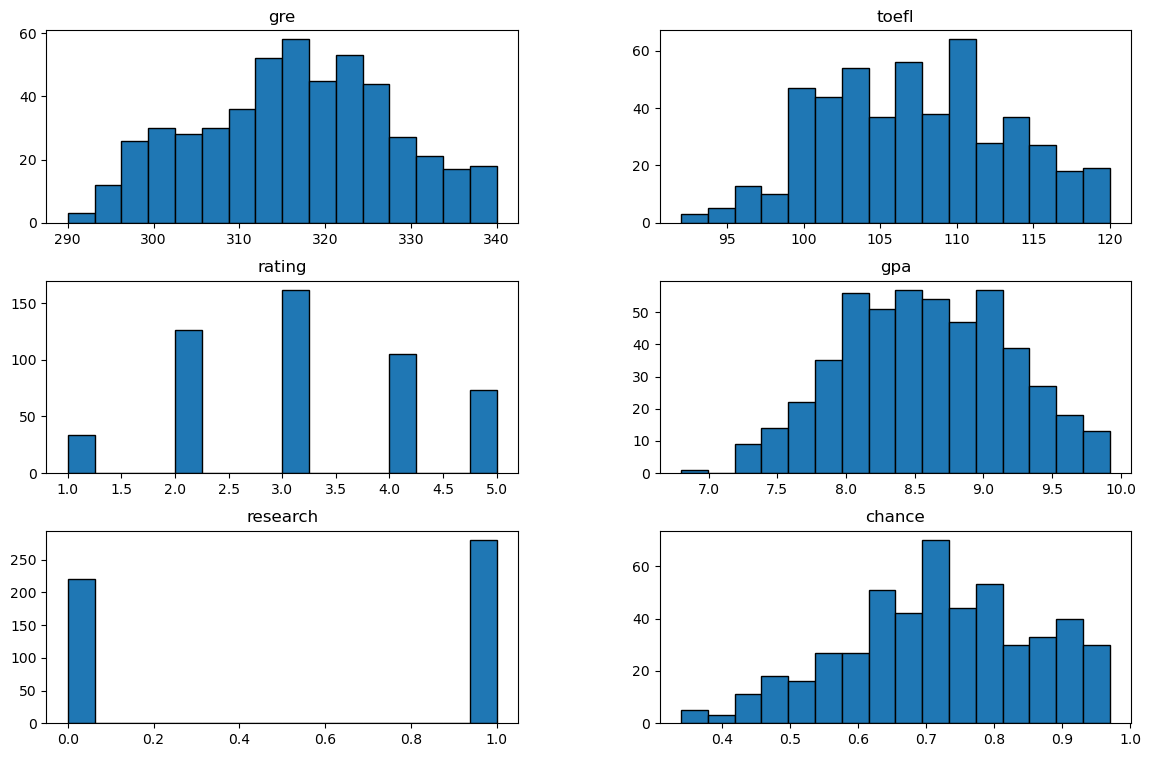

In [5]:
df[['gre','toefl','rating','gpa','research','chance']].hist(figsize=(14, 9),bins=16,linewidth='1',edgecolor='k',grid=False)
plt.show()

### 5. Show Correlation with Chance of Acceptance
Calculate correlation between each data column and Chance of Acceptance.  
Here we can see GPA, GRE score and TOEFL score are the most important features because they have the best correlation with acceptance.  
Research appears to be the least important feature.

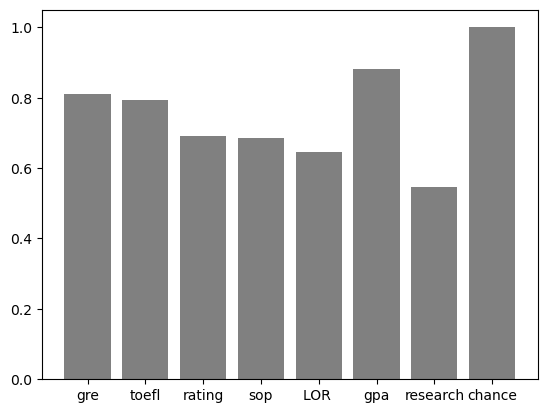

gre         0.810351
toefl       0.792228
rating      0.690132
sop         0.684137
LOR         0.645365
gpa         0.882413
research    0.545871
chance      1.000000
Name: chance, dtype: float64


In [6]:
correlation = df.corr()['chance']
plt.bar(df.columns, correlation, color='gray')
plt.show()
print(correlation)

### 6. Plot Relations between GRE & TOEFL, and GPA & GRE
We can see a strong correlation between TOEFL and GRE scores -- people scoring high on one probably scored high on the other.  
And we see a strong correlation between GPA and GRE -- people with a high GPA probably scored high on the GRE.

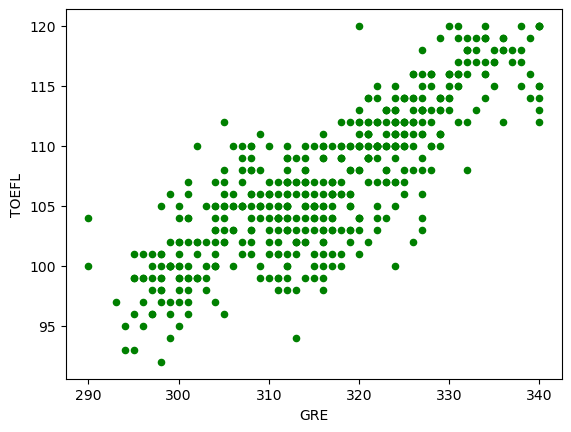

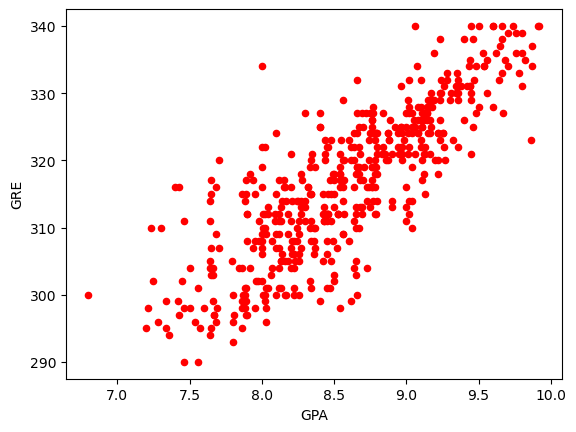

In [7]:
df.plot(kind='scatter', x='gre', y='toefl', color='green')
plt.xlabel("GRE")
plt.ylabel("TOEFL")
plt.show()

df.plot(kind='scatter', x='gpa', y='gre', color='red')
plt.xlabel("GPA")
plt.ylabel("GRE")
plt.show()

### 7. Plot relations between Chance and other Features

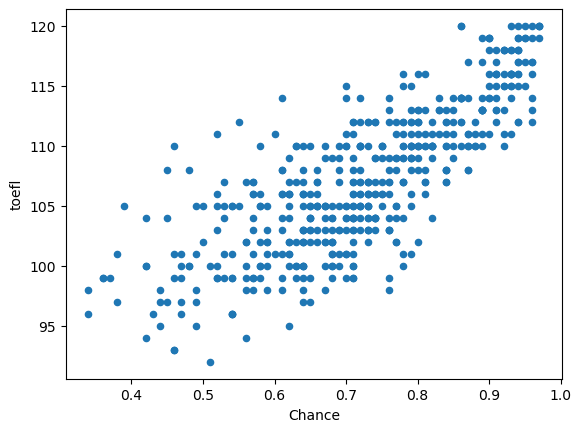

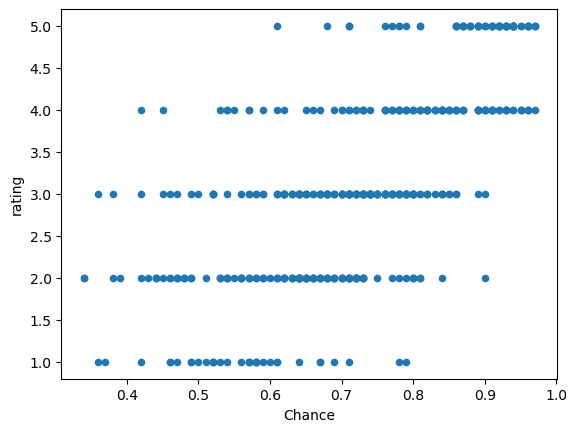

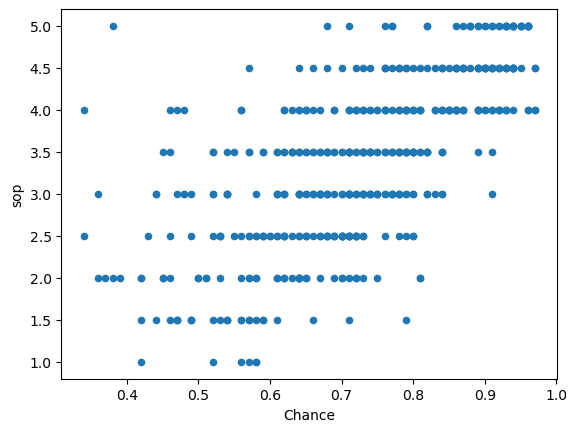

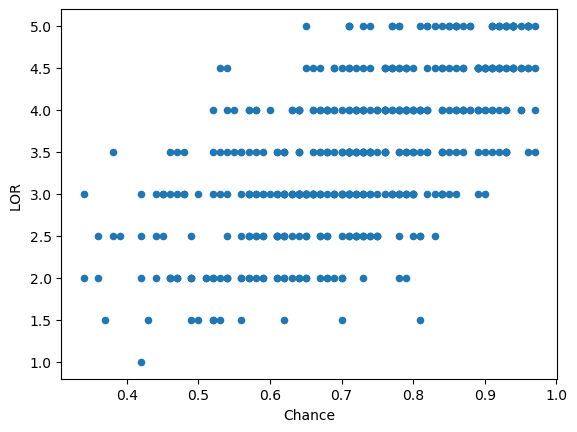

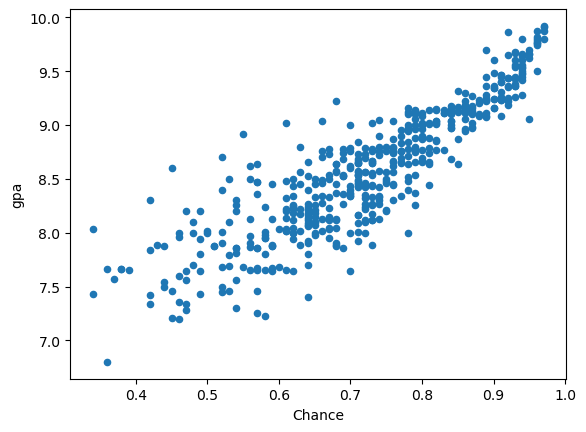

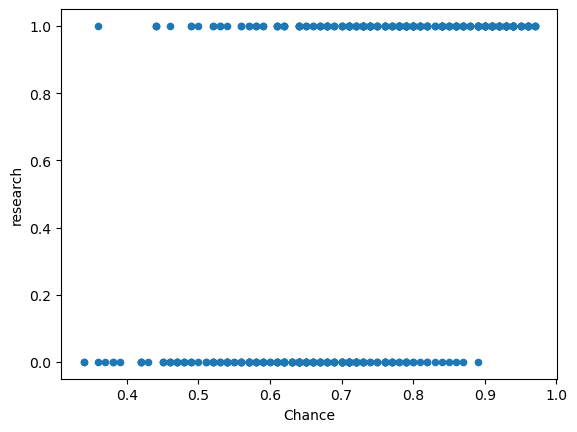

In [8]:
for i in range(1,7):
    df.plot(kind='scatter', x='chance', y=df.columns[i]) 
    plt.xlabel("Chance")
    plt.ylabel(df.columns[i])
    plt.show()